In [1]:
from PIL import Image
import glob
import os,copy,time
import matplotlib.pyplot as plt
import numpy as np

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


100
(100,)
/aiffel/aiffel/Explore_rock_scissor_paper/scissor/scissor/85.jpg <class 'str'> 85.jpg
(224, 224, 3)


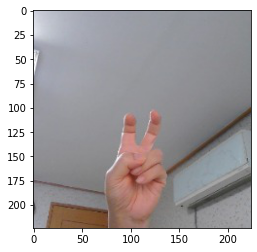

(56, 56, 3)


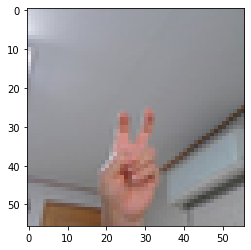

(112, 112, 3)


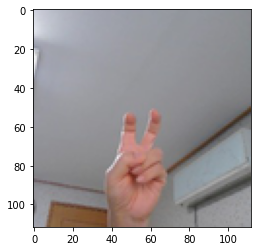

In [2]:
## 실제 사진 대조
#"""
image_dir_path = "/aiffel/aiffel/Explore_rock_scissor_paper/scissor/scissor"
images= glob.glob(image_dir_path + "/*.jpg")  
print(len(images))
print(np.array(images).shape)
target_size1=(56,56)
target_size2=(112,112)   
for img in images[-1:]:
    print(img,type(img),os.path.basename(img))
    old_img=Image.open(img)
    print(np.array(old_img).shape)
    plt.imshow(old_img)
    plt.show()
    new_img1=old_img.resize(target_size1,Image.ANTIALIAS)
    print(np.array(new_img1).shape)
    plt.imshow(new_img1)
    plt.show()
    new_img2=old_img.resize(target_size2,Image.ANTIALIAS)
    print(np.array(new_img2).shape)
    plt.imshow(new_img2)
    plt.show()
#"""    

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


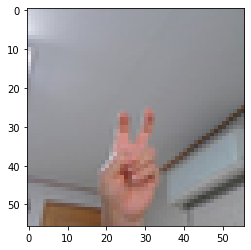

In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 56x56 사이즈로 바꾸어 저장합니다.
	target_size=(56,56)
	for img in images:
		old_img=Image.open(img)
		new_img = old_img.resize(target_size,Image.ANTIALIAS)
	plt.imshow(new_img)
	print(len(images), " images resized.")   
	return  new_img

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/Explore_rock_scissor_paper/scissor/scissor"
new_img_scissor = resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


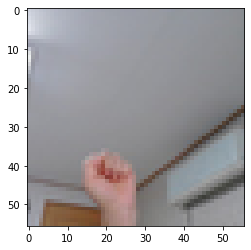

In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = "/aiffel/aiffel/Explore_rock_scissor_paper/rock/rock"
images= glob.glob(image_dir_path + "/*.jpg")  
print(len(images), " images to be resized.")

# 파일마다 모두 56x56 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
target_size=(56,56)
for img in images:
	old_img=Image.open(img)
	new_img_rock=old_img.resize(target_size,Image.ANTIALIAS)
plt.imshow(new_img_rock)
print(len(images), " images resized.")

print("바위 이미지 resize 완료!")


100  images to be resized.
100  images resized.
보 이미지 resize 완료!


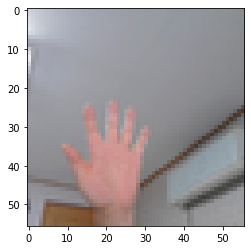

In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/Explore_rock_scissor_paper/paper/paper"
images= glob.glob(image_dir_path + "/*.jpg")  
print(len(images), " images to be resized.")

# 파일마다 모두 56x56 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
target_size=(56,56)
for img in images:
	old_img=Image.open(img)
	new_img_paper=old_img.resize(target_size,Image.ANTIALIAS)
plt.imshow(new_img_paper)    

print(len(images), " images resized.")

print("보 이미지 resize 완료!")


In [6]:
# 이미지 파일 저장없이 변수 저장분 사용

def load_data(new_img_scissor, new_img_rock, new_img_paper,img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=56
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
    imgs[:100,:,:,:]= new_img_scissor    # 데이터 영역에 가위 이미지 행렬을 복사
    labels[:100]= 0   # 가위 : 0
    
    imgs[100:200,:,:,:]= new_img_rock    # 데이터 영역에 바위 이미지 행렬을 복사
    labels[100:200]= 1   # 바위 : 1
    
    imgs[200:300,:,:,:]= new_img_paper    # 데이터 영역에 보 이미지 행렬을 복사
    labels[200:300]= 2   # 보 : 2

  
    if img_path.find('test')==-1:   
        print("학습데이터(x_train)의 이미지 개수는", imgs.shape[0],"입니다.")
    else:
        print("시험데이터(x_test)의 이미지 개수는", imgs.shape[0],"입니다.") 
           
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/Explore_rock_scissor_paper"

(x_train, y_train)=load_data(new_img_scissor, new_img_rock, new_img_paper, image_dir_path, number_of_data=300)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

x_train_norm_root= x_train_norm.copy()
y_train_root= y_train.copy()


학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 56, 56, 3)
y_train shape: (300,)


라벨:  0


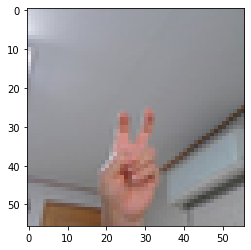

In [7]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1 = 16
n_channel_2 = 32#128
#n_channel_3 = 32#64
n_dense = 32#200
n_train_epoch = 10#100
n_kenel = 3  
n_pool = 2

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (n_kenel,n_kenel), activation='relu', input_shape=(56,56,3)))
model.add(keras.layers.MaxPool2D((n_pool,n_pool)))
model.add(keras.layers.Conv2D(n_channel_2, (n_kenel,n_kenel), activation='relu'))
model.add(keras.layers.MaxPooling2D((n_pool,n_pool)))
#model.add(keras.layers.Conv2D(n_channel_3, (n_kenel,n_kenel), activation='relu'))
#model.add(keras.layers.MaxPooling2D((n_pool,n_pool)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 54, 54, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                147488    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [12]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]'sparse_categorical_crossentropy'
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 모델 훈련: train vs valid = 80%:20%
print(n_train_epoch)
history = model.fit(x_train_norm, y_train, epochs=n_train_epoch, validation_split=0.20)
 

10
Epoch 1/10
8/8 [==============================] - 0s 22ms/step - loss: 1.0559 - accuracy: 0.5292 - val_loss: 1.8732 - val_accuracy: 0.0000e+00
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 1.0252 - accuracy: 0.4167 - val_loss: 1.7149 - val_accuracy: 0.0000e+00
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 1.0006 - accuracy: 0.6750 - val_loss: 1.6219 - val_accuracy: 0.0000e+00
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.9676 - accuracy: 0.4167 - val_loss: 1.5429 - val_accuracy: 0.0000e+00
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8999 - accuracy: 0.8333 - val_loss: 1.3079 - val_accuracy: 0.0000e+00
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.7780 - accuracy: 0.8917 - val_loss: 1.2573 - val_accuracy: 0.0000e+00
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 0.5752 - accuracy: 0.9167 - val_loss: 0.3885 - val_accuracy: 1.0000
Epoch 

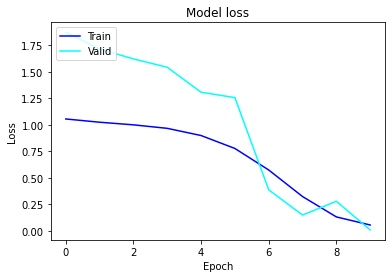

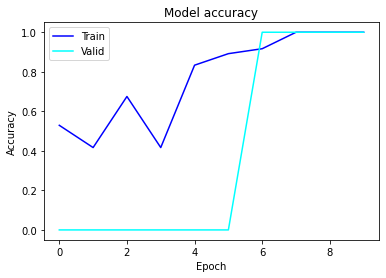

In [13]:
# 훈련 과정 시각화 (loss): train, valid
plt.plot(history.history['loss'],'blue')
plt.plot(history.history['val_loss'],'cyan')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()       

# 훈련 과정 시각화 (accuracy): train, valid
plt.plot(history.history['accuracy'],'blue')
plt.plot(history.history['val_accuracy'],'cyan')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
시험데이터(x_test)의 이미지 개수는 300 입니다.
x_test1 shape: (300, 56, 56, 3)
y_test1 shape: (300,)
라벨:  0


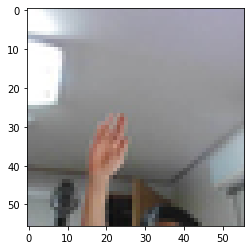

In [15]:
# x_test1, y_test1를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]

# [테스트 데이터셋 2] . 조원의 데이터
image_dir_path = os.getenv("HOME") + "/aiffel/Explore_rock_scissor_paper/test_data1"
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path_scissor = image_dir_path + "/scissor/scissor"
new_img_scissor = resize_images(image_dir_path_scissor)
print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path_rock = image_dir_path + "/rock/rock"
new_img_rock = resize_images(image_dir_path_rock)
print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path_paper = image_dir_path + "/paper/paper"
new_img_paper = resize_images(image_dir_path_paper)
print("보 이미지 resize 완료!")

# x_test1, y_test1  
(x_test1, y_test1)=load_data(new_img_scissor, new_img_rock, new_img_paper, image_dir_path, number_of_data=300)
x_test_norm1 = x_test1/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test1 shape: {}".format(x_test1.shape))
print("y_test1 shape: {}".format(y_test1.shape))


print('라벨: ', y_test1[0])

In [16]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm1, y_test1, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 0.2573 - accuracy: 1.0000
test_loss: 0.2573074698448181 
test_accuracy: 1.0


### <성능높이기 시도>:성능높이기 시도는 Test Accuracy가 100%라서, 성능높이기시도는 생략합니다.아래부분은 이미지size 조정하면서, 덮아씌어진지 인지하지 못하고, 성능향상시도하면서, 시도한 하이퍼파람 튜닝공부입니다.

In [17]:
### [성능 높이기시도]
# Accuracy가 적게나와서, train data 300 중 80%를 train data로, 20%를 valid data로 사용하고,\
# Hyperparam을 약식 튜닝해봄(전체를 grid search 식으로 하면 시간이 많이 소용되어,약식으로 시도)

# train, valid 분리
x_train_norm = x_train_norm_root.copy()
y_train = y_train_root.copy()

print("x_train_norm.shape",x_train_norm.shape,"y_train.shape",y_train.shape)
#x_train_norm, x_valid_norm = x_train_norm[:240],x_train_norm[240:]    
#y_train, y_valid = y_train[:240],y_train[240:]

print("x_train_norm shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))
#print("x_valid_norm shape: {}".format(x_valid_norm.shape))
#print("y_valid shape: {}".format(y_valid.shape))

x_train_norm.shape (300, 56, 56, 3) y_train.shape (300,)
x_train_norm shape: (300, 56, 56, 3)
y_train shape: (300,)


In [18]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1_list= [8, 16, 32, 64]  
n_channel_2_list= [16, 32, 64, 128]
n_dense_list = [16,32, 64, 128] 
n_train_epoch_list = [20, 30, 50] 
#optimizer_list = ['adam'] #[tf.keras.optimizers.Adam(),tf.keras.optimizers.RMSprop()]

n_channel_1,n_channel_2,n_dense,n_train_epoch = 8, 16, 16, 20

# 학습및 검증 함수
def learning_with_valid_data(n_channel_1,n_channel_2,n_dense,n_train_epoch):  #,n_optimizer):
    model=keras.models.Sequential()
    model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_dense, activation='relu'))
    model.add(keras.layers.Dense(3, activation='softmax'))
    model.summary()

    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    # 모델 훈련
    history = model.fit(x_train_norm, y_train, epochs= int(n_train_epoch), validation_split=0.20)
    
    # 모델 검증
    #valid_loss, valid_accuracy = model.evaluate(x_valid_norm, y_valid, verbose=0)
    #print(f"valid_loss: {valid_loss} ")
    #print(f"valid_accuracy: {valid_accuracy}")

    return  history 

In [ ]:
subhistory = []
best_hparam_list = []
total_hparam_list = [n_channel_1_list,n_channel_2_list, n_dense_list, n_train_epoch_list, optimizer_list]
# 약식 튜닝 
prev_best_accuracy = 0

for i, hparam_list in enumerate(total_hparam_list):
    for ii, hparam in enumerate(hparam_list):
        if i == 0:
            n_channel_1 = hparam
        elif i == 1:    
            n_channel_2 = hparam
        elif i == 2:
            n_dense = hparam
        elif i == 3:    
            n_train_epoch = int(hparam)
        elif i == 4:
            n_optimizer = hparam   

        # 학습/검증   
        history = learning_with_valid_data(n_channel_1,n_channel_2,n_dense,n_train_epoch)#, n_optimizer)
        
        #valid_loss, valid_accuracy = learning_with_valid_data(n_channel_1,n_channel_2,n_dense,n_train_epoch)#, n_optimizer)
        #subhistory.append([i, hparam, valid_loss, valid_accuracy])
        #print("subhistory",subhistory)   
        
    subhistory = np.array(subhistory)
    print("subhistory!!!",subhistory)
    subbest= subhistory[subhistory[:,-1]==subhistory[:,-1].max()]
    print("subbest!!!", subbest,"subbest= subhistory[subhistory[:,-1]==subhistory[:,-1].max()]")
    print(f"i {i} subbest_best_hyperparam", subbest[0][1])  #[]한꺼풀벗겨야함
    print(f"i {i} subbest_accuracy",subbest[0][-1])    #[]한꺼풀벗겨야함
    # subhistory 를 list로 재전환
    subhistory = []

    # sub best 집계
    best_hparam_list.append(subbest[0])
   
    # hparam별 best param입력: 직전 best accuracy보다 높을때만, 아니면 기존 유지
    if subbest[0][1] > prev_best_accuracy:
        if i == 0:
            n_channel_1 = subbest[0][1]            
        elif i == 1:    
            n_channel_2 = subbest[0][1]
        elif i == 2 :
            n_dense = subbest[0][1]
        elif i == 3:    
            n_train_epoch = int(subbest[0][1])
        elif i == 4:
            n_optimizer = subbest[0][1]  

    # 직전 best_accuracy 비교위해 저장
    prev_best_accuracy = subbest[0][-1]

best_hparam_list.append(subbest)
print("best_hparam_list",best_hparam_list)    
print("최종 valid 성능: ", "valid loss", best_hparam_list[-1][-1][-2],\
                  "valid accuracy", best_hparam_list[-1][-1][-1])

In [ ]:
### 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"최종 test_loss: {test_loss} ")
print(f"최종 test_accuracy: {test_accuracy}")